/opt/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


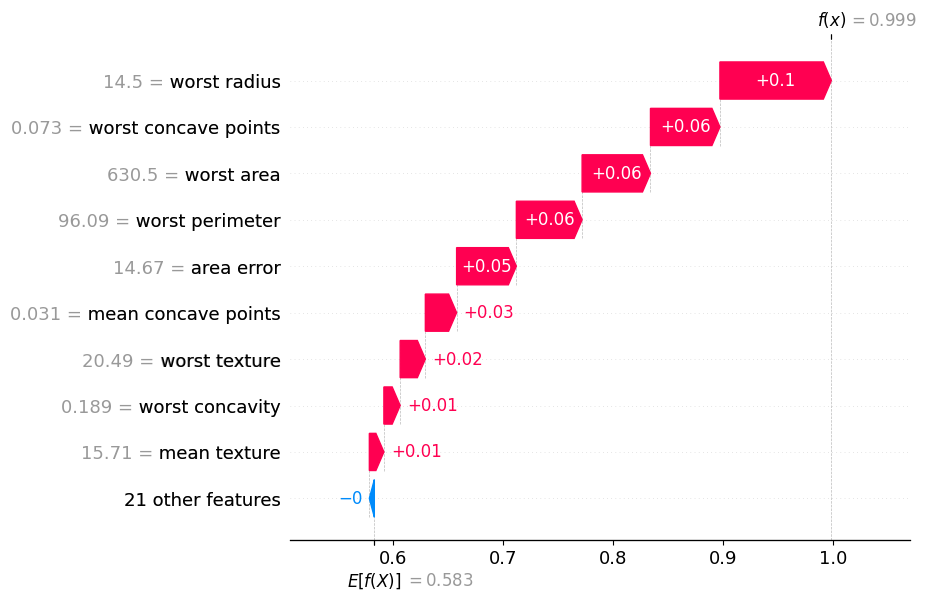

In [1]:
!pip install xgboost
!pip install shap
import xgboost
from sklearn.datasets import load_breast_cancer
import shap
import pandas as pd

# Load the Breast Cancer dataset
# We will train a classifier to determine whether a given breast cancer falls into one of three categories.
bc_data = load_breast_cancer()

# TODO: Set the features and targets of the breast cancer dataset
X = pd.DataFrame(data=bc_data.data, columns=bc_data.feature_names)
y = bc_data.target

# Establish the baseline sample and appropriate index
X100 = shap.utils.sample(X, 100)
sample_ind = 20
xg_boost_model = xgboost.XGBRegressor(n_estimators=10, max_depth=3).fit(X, y)

# explain the model with SHAP values
explainer_xgb = shap.Explainer(xg_boost_model, X100)
shap_values_xgb = explainer_xgb(X)

shap.plots.waterfall(shap_values_xgb[sample_ind])

<b> Given the plot shown above, list the most important features for our breast cancer classification model: </b>